__Portfolio Assignment__ 
I receive allowances for written work in line with my individual support plan (disability allowance)

Block One Submission

__Importing Data and Packages__

In [2]:
# Import essential packages 

# Visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt

# Data manipulation packages
import pandas as pd
import numpy as np

In [3]:
# Import the warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load in required dataset and as a dataframe
titanic = sns.load_dataset('titanic')

In [5]:
# Initial exploration of dataset
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

__Cleaning data__

In [8]:
# Explore data for null values in order to clean

In [9]:
titanic.isnull

<bound method DataFrame.isnull of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [10]:
# Total null values in each column
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# Drop unwanted deck column using .drop()
titanic.drop(['deck'], axis=1)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  
0      man        True  Southampton    no  False  
1    woman       False    Cherbourg   yes  False  
2    woman       False  Southampton   yes   True  
3    woman       False  Southampton   yes  False  
4      man        True  Southampton    no   True  
..     ...         ...          ...   ...    ...  
886    man        True  Southampton    no   True  
887  woman       False  Southampton   yes   True  
888  woman       False  Southampton    no  False  
889    man        True    Cherbourg   yes   True  
890    man        True   Queenstown    no   True  

[891 rows x 14 columns]

In [12]:
# New dataframe without unwanted column

In [13]:
# Locate passengers with missing 'embarked' data
titanic.loc[titanic['embarked'].isna()]

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  
61   woman       False    B         NaN   yes   True  
829  woman       False    B         NaN   yes   True

In [14]:
# Drop missing data points
titanic.dropna(subset=['embarked'], inplace=True)

In [15]:
# Double checking data points were removed 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [16]:
# Swaping variable from 0-1 into 'Survived' and 'Did not survive' (string) to make a clearer plot
titanic['survived'] = titanic['survived'].astype('bool').replace({True:'Survived',False:'Did not Survive'})

__Visualisation__

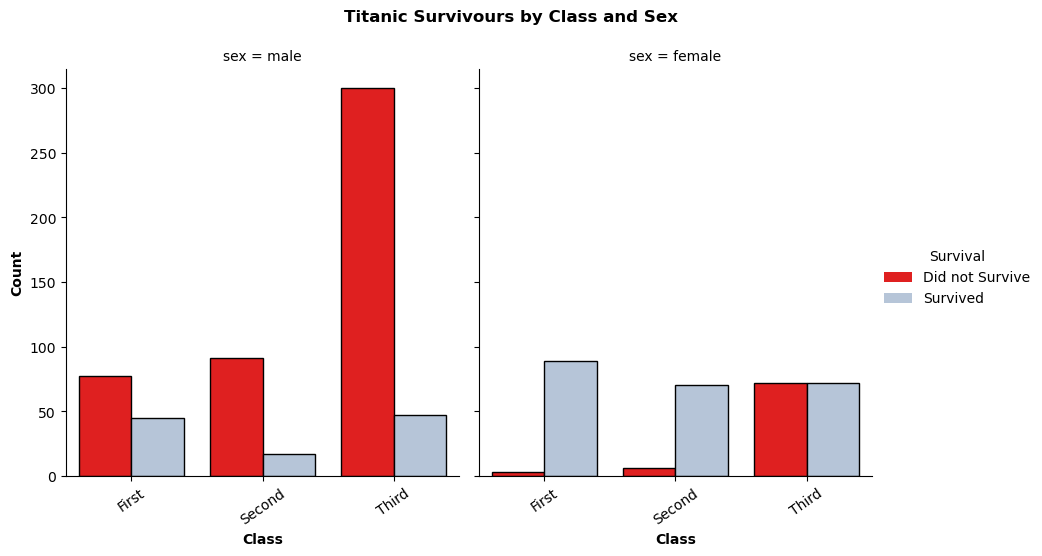

In [26]:
# Plotting visulasation

# Visual Aspects
# Create custom colour palette
custom_colors = { "Survived": "lightsteelblue", "Did not Survive": "Red"}

#Plot catplot including all variables and adjust aesthetics
g = sns.catplot(x="class", hue="survived", col="sex",
                data=titanic, kind="count", height=5, aspect=0.9, palette=custom_colors)

# Adding titles, labels and legend titles
g.set_axis_labels("Class", "Count", fontweight='bold')
plt.suptitle("Titanic Survivours by Class and Sex", fontweight='bold', fontsize=12, y=1.05)
g._legend.set_title("Survival")

# Adding boundary edges for aesthetic purposes (I used Chat GPT to help code this)
for ax in g.axes.flat:
    for bar in ax.patches:
        bar.set_edgecolor('black')


# Rotating category labels 
g.set_xticklabels(rotation=35)


The visualisation above shows number of survivors from the titanic divided firstly, by class (first, second and third) and sex (male and female), with an additional categorical variable of whether or not the passenger survived. Through initial analysis of the data, it is clear to see that more men did not survive, especially those in the bottom two classes. Very few women that were in the top two classes did not survive. While constructing this visualisation, appropriate titles and axis labels were added, making sure the overarching axis labels (count and class) were in bold script, to increase readability of main points. Additionally, X-axis variable labels (the three classes) were rotated (35 degrees), in order to help differentiate between those variables and the overarching titles. A legend was created, in which variable names ('True' and 'False') were changed to 'survived' and 'did not survive' respectively, during the cleaning and preparation phase, for easier interpretation of the added categorical variable. A custom colour palette was created firstly, to suit colourblind readers, avoiding mixing reds and greens, this was checked using colourbrewer. Also, a choice was made specifically to use a shade of red for the 'did not survive' category, as red is more likely to be associated with negative outcomes compared to the lighter colour of the other category. Very different colours were used to avoid any confusion between the two categories. Finally, a thin black boundary was added around each bar to accentuate each block of data.

__Block Two Submission__

In [18]:
#Load in extra required packages, base packages loaded in for block one 

import geopandas as gpd
import pyproj
import contextily as ctx

import geoplot as gplt
import geoplot.crs as gcrs


In [19]:
#Load in data.frame and print path 
countries_path = gpd.datasets.get_path('naturalearth_lowres')
print(countries_path)

/Users/oliviariley/anaconda3/envs/spatial_env/lib/python3.11/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp


In [20]:
# Read in shapefile data
countries = gpd.read_file('/Users/oliviariley/anaconda3/envs/spatial_env/lib/python3.11/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp')

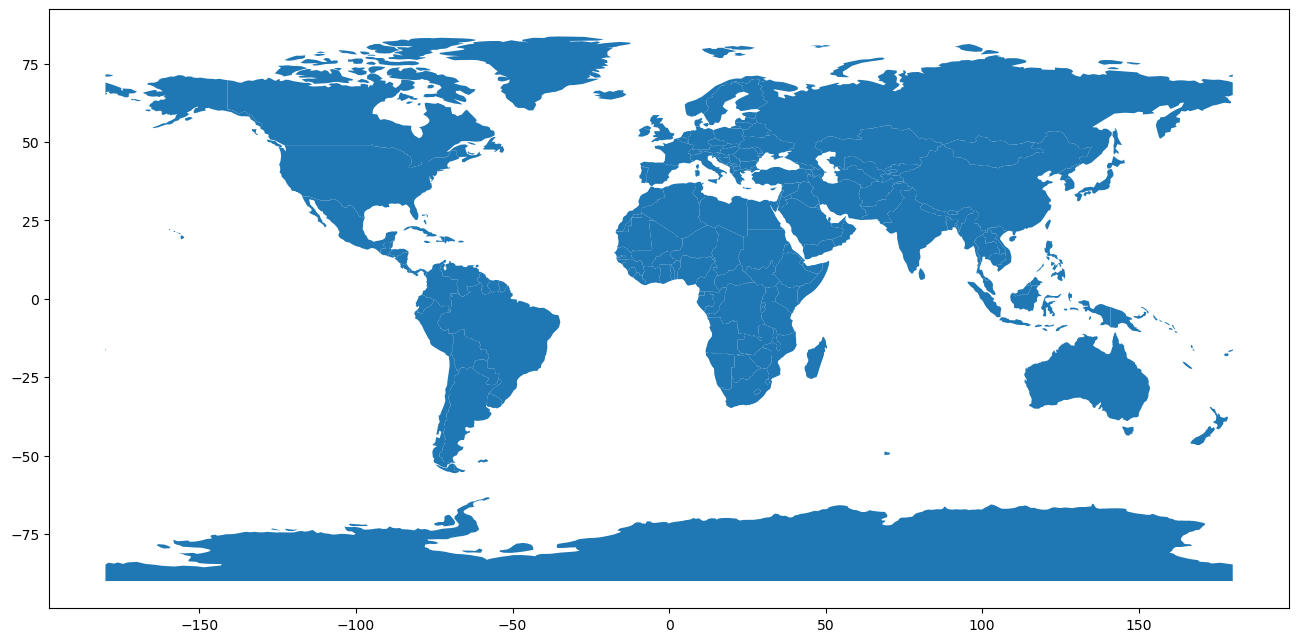

In [21]:
# Plot all countries to check data has read in correctly 
f,ax = plt.subplots(1, figsize=(16, 8))
countries.plot(ax=ax)
plt.show()

In [22]:
#Sub-set spatial data (cleaning/preparing)
SA= countries.loc[countries['continent']=='South America']

In [23]:
#View South American data 
SA

pop_est      continent          name iso_a3  gdp_md_est  \
9     44938712.0  South America     Argentina    ARG      445445   
10    18952038.0  South America         Chile    CHL      282318   
20        3398.0  South America  Falkland Is.    FLK         282   
28     3461734.0  South America       Uruguay    URY       56045   
29   211049527.0  South America        Brazil    BRA     1839758   
30    11513100.0  South America       Bolivia    BOL       40895   
31    32510453.0  South America          Peru    PER      226848   
32    50339443.0  South America      Colombia    COL      323615   
40    28515829.0  South America     Venezuela    VEN      482359   
41      782766.0  South America        Guyana    GUY        5173   
42      581363.0  South America      Suriname    SUR        3697   
44    17373662.0  South America       Ecuador    ECU      107435   
156    7044636.0  South America      Paraguay    PRY       38145   

                                              geometry  
9    MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
10   MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
20   POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...  
28   POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...  
29   POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
30   POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...  
31   POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32   POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  
40   POLYGON ((-60.73357 5.20028, -60.60118 4.91810...  
41   POLYGON ((-56.53939 1.89952, -56.78270 1.86371...  
42   POLYGON ((-54.52475 2.31185, -55.09759 2.52375...  
44   POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...  
156  POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...

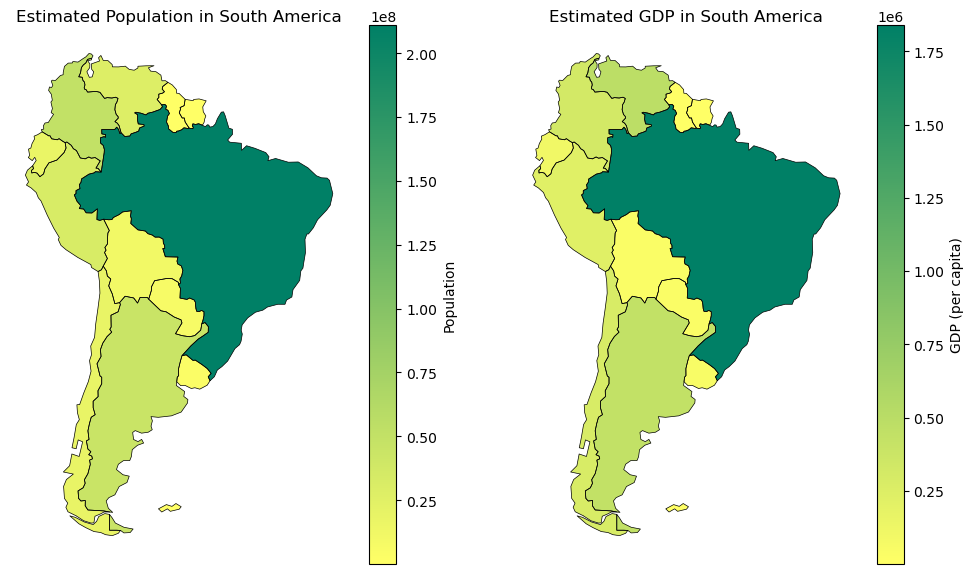

In [27]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(1,2, figsize=(12,7))

# plot population estimate in subplot 1
SA.plot(ax=ax[0], column ='pop_est', legend=True, cmap='summer_r', legend_kwds= {'label': "Population"})


# plot gdp estimate in subplot 2
SA.plot(ax=ax[1], column ='gdp_md_est', legend=True, cmap='summer_r', legend_kwds= {'label': "GDP (per capita)"})

# give subplot 1 an informative title
ax[0].set_title('Estimated Population in South America')

# give subplot 2 an informative title
ax[1].set_title('Estimated GDP in South America')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 2
ax[1].set_axis_off()

# adding boundary around countries 
SA.boundary.plot(ax=ax[0], color='black', linewidth=0.5)
SA.boundary.plot(ax=ax[1], color='black', linewidth=0.5)

# show plotted map 
plt.show()

The static spatial visualisation above shows both estimated population and estimated GDP within the South America continent. During the cleaning and preparation process, using the .loc() function, the data set of world countries was subsetted to outline only the countries located on the South American continent. Appropriate titles were added to both plots as well as suitable legend titles where appropriate showing units, as 1e8/1e6 are not simple units to interpret without a guide. Both axis grids were made 'invisible' as they tend to distract from the visualisation and do not add any relevant detail. Due to the fact that continuous variables were used, a sequential colour scheme "summer_r" was implimented. The "summer" colour scheme was reversed in order as it is important to have a colour scheme range from light (lower) to dark (higher). As in this case darker shades imply a more dense population and higher GDP rates. Finally, a thin black boundary was added around each country to make it easier to differentiate between countries that may have similar colours in terms of estimated population and estimated GDP. 